## Imports

In [1]:
from data_utils import *

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

## Load Dataset

In [3]:
dataset1_path = "../../../dataset 1"
dataset2_path = "../../../dataset 2(only lp)/41082077licence_img"

raw_data1, raw_data2 = load_data(dataset1_path, dataset2_path)

In [4]:
xtrain, xtest, ytrain, ytest = convert_data(raw_data1)
xtrain2, xtest2, ytrain2, ytest2 = raw_data2['X'][:3000], raw_data2['X'][3000:], raw_data2['y'][:3000], raw_data2['y'][3000:]
(xtrain3, ytrain3), (xtest3, ytest3) = convert_data2(xtrain, ytrain), convert_data2(xtest, ytest)

## (Checkpoint) Load/Save Data Dictionary

In [ ]:
data_save_dir = "saved datasets"
data_name = "version3"
if not os.path.isdir(data_save_dir):
    os.makedirs(data_save_dir)
    
dataset1_path = os.path.join(data_save_dir, data_name+"_dataset1.p")
dataset2_path = os.path.join(data_save_dir, data_name+"_dataset2.p")
dataset3_path = os.path.join(data_save_dir, data_name+"_dataset3.p")

In [ ]:
# LOAD dataset dictionary
if ('xtrain' not in globals()): # if dataset 1 is not yet loaded
    with open(dataset1_path, 'rb') as fp:
        xtrain, xtest, ytrain, ytest = pickle.load(fp)
if ('xtrain2' not in globals()):
    with open(dataset2_path, 'rb') as fp:
        xtrain2, xtest2, ytrain2, ytest2 = pickle.load(fp)
if ('xtrain3' not in globals()):
    with open(dataset3_path, 'rb') as fp:
        xtrain3, xtest3, ytrain3, ytest3 = pickle.load(fp)

In [ ]:
# SAVE dataset dictionary
if not os.path.isfile(dataset1_path) or not os.path.isfile(dataset2_path): # if dataset is not already saved
    with open(dataset1_path, 'wb') as fp:
        pickle.dump((xtrain, xtest, ytrain, ytest), fp, protocol=pickle.HIGHEST_PROTOCOL)
    with open(dataset2_path, 'wb') as fp:
        pickle.dump((xtrain2, xtest2, ytrain2, ytest2), fp, protocol=pickle.HIGHEST_PROTOCOL)
    with open(dataset3_path, 'wb') as fp:
        pickle.dump((xtrain3, xtest3, ytrain3, ytest3), fp, protocol=pickle.HIGHEST_PROTOCOL)

## Visualize Datasets

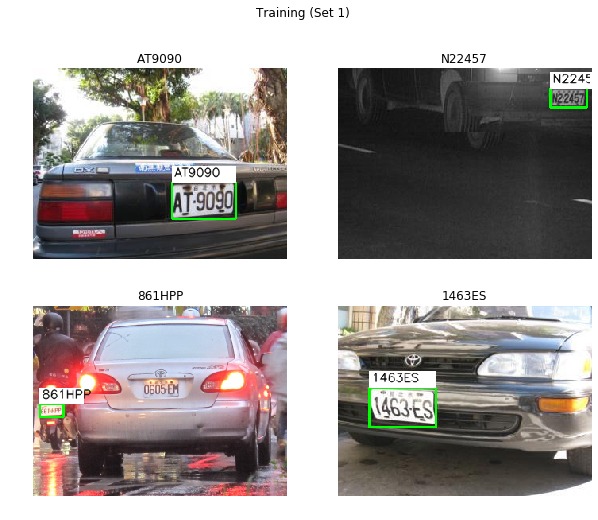

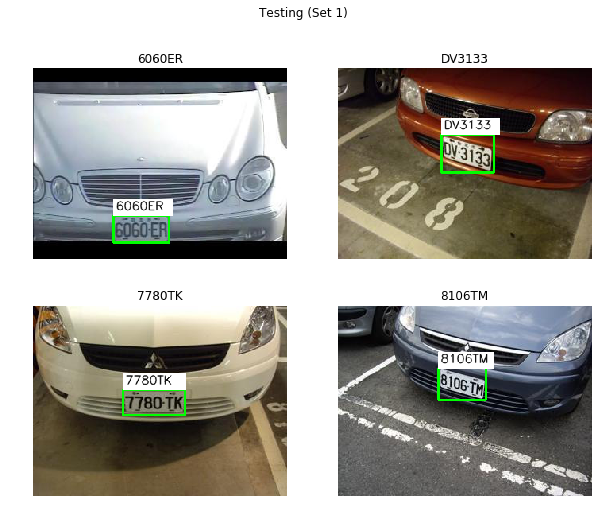

In [5]:
visualize_dataset(xtrain, ytrain, "Training (Set 1)")
visualize_dataset(xtest, ytest, "Testing (Set 1)")

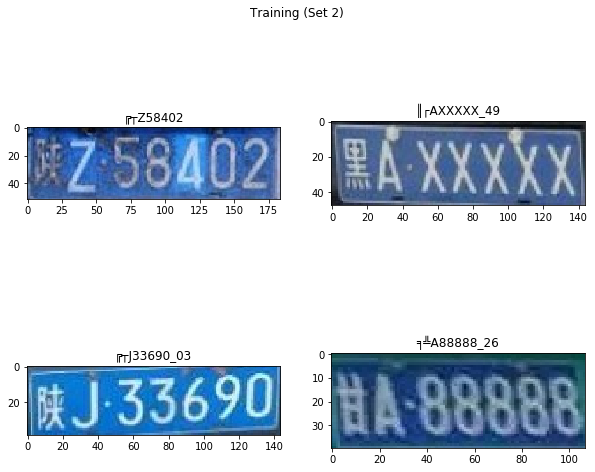

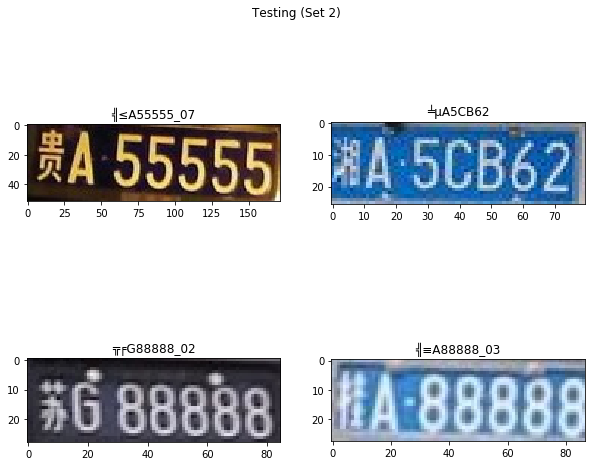

In [6]:
visualize_dataset(xtrain2, ytrain2, "Training (Set 2)", show_boxes=False)
visualize_dataset(xtest2, ytest2, "Testing (Set 2)", show_boxes = False)

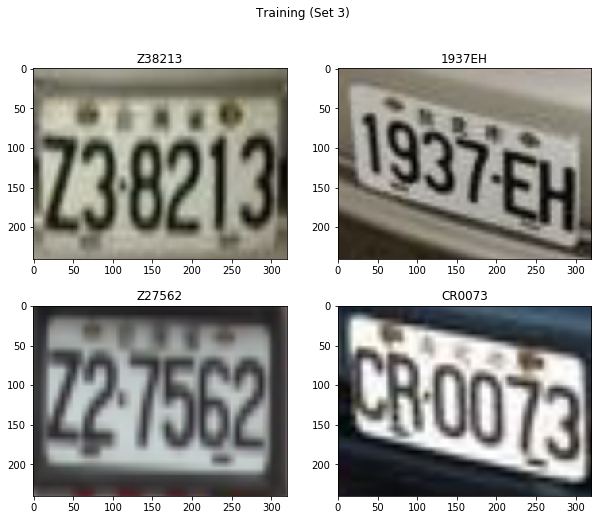

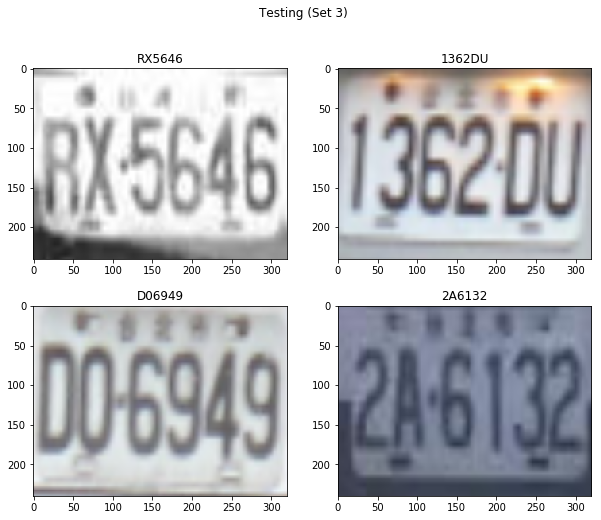

In [7]:
visualize_dataset(xtrain3, ytrain3, "Training (Set 3)", show_boxes=False)
visualize_dataset(xtest3, ytest3, "Testing (Set 3)", show_boxes = False)

## Create Dataset Directory for Deeplearning-OCR (Using "dataset3")

In [5]:
from PIL import Image
main_directory = "../../sandbox/Deeplearning-OCR/dataset/"

train_directory = main_directory+"Train/"
test_directory = main_directory+"Test/"

In [10]:
# Save Images
for i in range(len(xtrain3)):
    Image.fromarray(xtrain3[i]).save(train_directory+str(i)+".jpeg")
for i in range(len(xtest3)):
    Image.fromarray(xtest3[i]).save(test_directory+str(i)+".jpeg")

In [11]:
train_text = "\n".join([str(i)+".jpeg "+ytrain3[i] for i in range(len(xtrain3))])
test_text = "\n".join([str(i)+".jpeg "+ytest3[i] for i in range(len(xtest3))])
with open(train_directory+"sample.txt",'w') as fp:
    fp.write(train_text)
with open(test_directory+"sample.txt",'w') as fp:
    fp.write(test_text)

## Create Dataset Directory for Deeplearning-OCR (Using ALPR dataset)

In [68]:
#Note: combined testing and validation data together for a larger test set (the script does the split itself)

dataset_dir = "../../UFPR-ALPR dataset/"
# use main_directory variable from previous example

training_dir = main_directory+"Train/"
testing_dir = main_directory+"Test/"

training_sample = [] # sample.txt for training data
testing_sample = [] # sample.txt for test and validation data combined

for data_folder in ['testing','training','validation']:
    data_folder_path = dataset_dir + data_folder + "/"
    for track_number in [x for x in os.listdir(data_folder_path) if x[:5]=="track"]:
        track_path = data_folder_path + track_number + "/"
        for data_file in [x for x in os.listdir(track_path) if x[-4:] == '.png'][:1]: # for *single* png
            img_path = track_path + data_file
            txt_path = track_path + data_file[:-4] + ".txt"
            # read license plate and its coords
            with open(txt_path,'r') as fp:
                q = fp.read()
                license_plate_txt = q.split('\n')[6].split(': ')[1].replace('-','') # read License from txt file
                coords = [int(x) for x in q.split('\n')[7].split(': ')[1].split(' ') if x!=' ']
            # transform image to just license plate
            x1, y1, x2, y2 = coords[0], coords[1], coords[0]+coords[2], coords[1]+coords[3]
            img=plt.imread(img_path)
            pts1 = np.float32([[x1, y1], [x2, y1], [x1, y2]])
            pts2 = np.float32([[0,0], [img.shape[1], 0], [0, img.shape[0]]])
            img=cv2.warpAffine(img, cv2.getAffineTransform(pts1,pts2),(img.shape[1], img.shape[0]))
            if (data_folder == 'training'):
                plt.imsave(training_dir+data_file, img)
                training_sample.append(data_file+" "+license_plate_txt)
            else: # test/val (put in test folder)
                plt.imsave(testing_dir+data_file, img)
                testing_sample.append(data_file+" "+license_plate_txt)
with open(training_dir+"sample.txt",'w') as fp:
    fp.write("\n".join(training_sample))
with open(testing_dir+"sample.txt",'w') as fp:
    fp.write("\n".join(testing_sample))